Урок 6. Градиентный бустинг (AdaBoost)

1.Для реализованной модели градиентного бустинга построить графики зависимости ошибки от количества деревьев в ансамбле и от максимальной глубины деревьев. Сделать выводы о зависимости ошибки от этих параметров.

In [1]:
from sklearn.tree import DecisionTreeRegressor

from sklearn import model_selection
import numpy as np

In [2]:
from sklearn.datasets import load_diabetes

In [3]:
X, y = load_diabetes(return_X_y=True)

In [4]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25)

In [7]:
# Функция предсказания
def gb_predict(X, trees_list, coef_list, eta):
    # Реализуемый алгоритм градиентного бустинга будет инициализироваться нулевыми значениями,
    # поэтому все деревья из списка trees_list уже являются дополнительными и при предсказании прибавляются с шагом eta
    return np.array([sum([eta* coef * alg.predict([x])[0] for alg, coef in zip(trees_list, coef_list)]) for x in X])

In [8]:
# Реализация mse
def mean_squared_error(y_real, prediction):
    return (sum((y_real - prediction)**2)) / len(y_real)

In [9]:
def bias(y, z):
    return (y - z)

In [10]:
# Градиентный бустинг
def gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta):
    
    # Деревья будем записывать в список
    trees = []
    
    # Будем записывать ошибки на обучающей и тестовой выборке на каждой итерации в список
    train_errors = []
    test_errors = []
    
    for i in range(n_trees):
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)

        # инициализируем бустинг начальным алгоритмом, возвращающим ноль, 
        # поэтому первый алгоритм просто обучаем на выборке и добавляем в список
        if len(trees) == 0:
            # обучаем первое дерево на обучающей выборке
            tree.fit(X_train, y_train)
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))
        else:
            # Получим ответы на текущей композиции
            target = gb_predict(X_train, trees, coefs, eta)
            # алгоритмы начиная со второго обучаем на сдвиг
            tree.fit(X_train, bias(y_train, target))
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))

        trees.append(tree)
        
    return trees, train_errors, test_errors

In [13]:
# Сначала зависимость от количества деревьев:
n_trees = 50
coefs = [1] * n_trees
max_depth = 4
eta = 0.1
trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

In [14]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

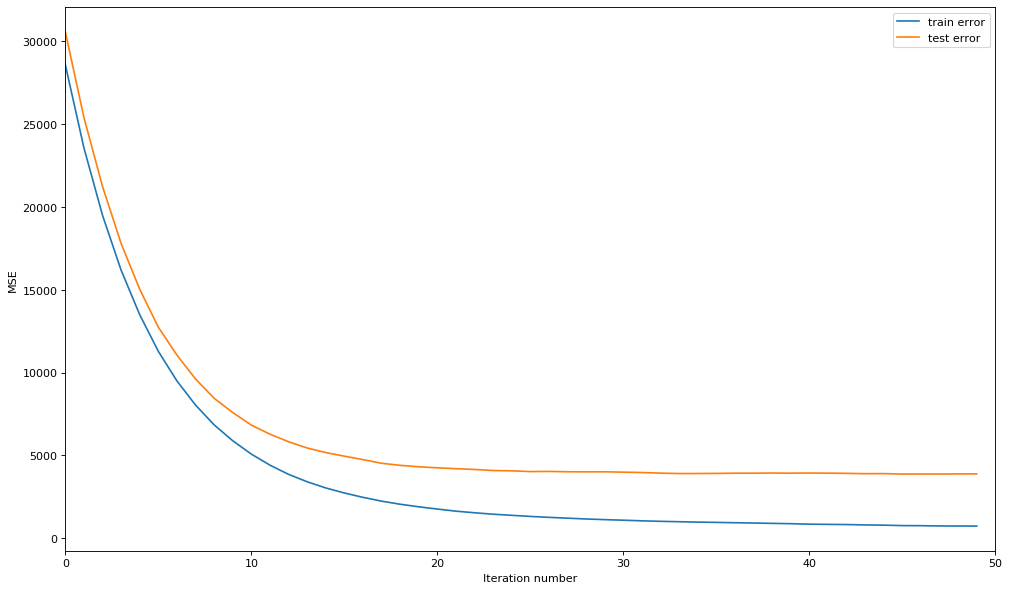

In [16]:
from matplotlib.pyplot import figure
figure(figsize=(15, 9), dpi=80, facecolor='w', edgecolor='k')
plt.xlabel('Iteration number')
plt.ylabel('MSE')
plt.xlim(0, n_trees)
plt.plot(list(range(n_trees)), train_errors, label='train error')
plt.plot(list(range(n_trees)), test_errors, label='test error')
plt.legend(loc='upper right')
plt.show()

In [22]:
# При eta = 0.1 увеличение реального качества модели прекращается между 20 и 30 деревьями

In [20]:
# Сначала зависимость от количества деревьев:
n_trees = 10
coefs = [1] * n_trees
max_depth = 4
eta = 1
trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

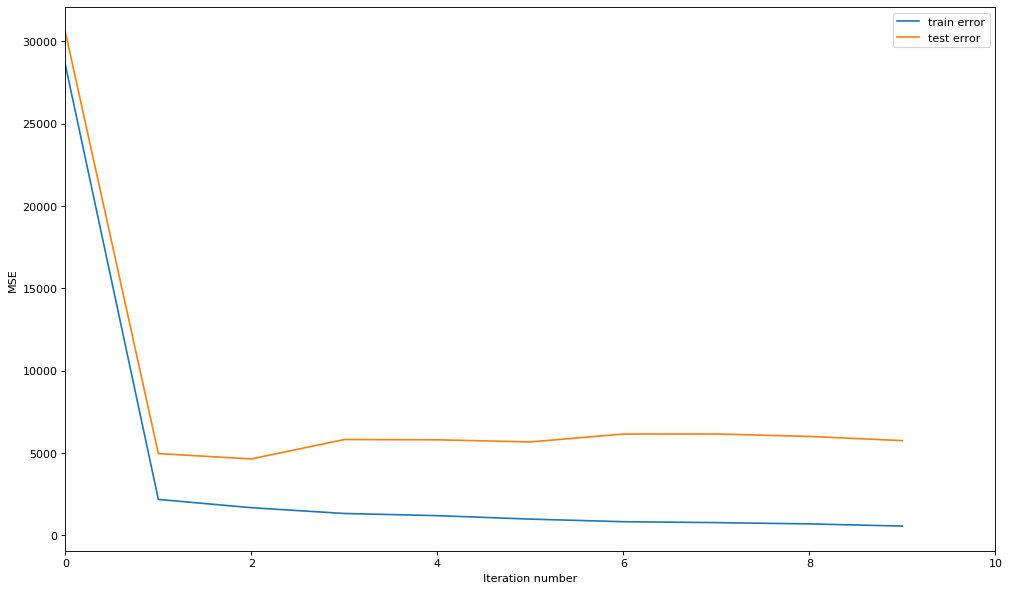

In [21]:
figure(figsize=(15, 9), dpi=80, facecolor='w', edgecolor='k')
plt.xlabel('Iteration number')
plt.ylabel('MSE')
plt.xlim(0, n_trees)
plt.plot(list(range(n_trees)), train_errors, label='train error')
plt.plot(list(range(n_trees)), test_errors, label='test error')
plt.legend(loc='upper right')
plt.show()

In [23]:
# При шаге в 10 раз больше - лучший результат достигается прогнозируемо на двух деревьях - дальше ухудшение 

In [33]:
# Теперь глубина.. у нас до этого была = 4

In [25]:
test_errors = []
train_errors = []
for max_depth in range(1, 10):
    n_trees = 25
    coefs = [1] * n_trees
    eta = 0.1
    trees, train_err, test_err = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)
    train_errors.append(train_err[-1])
    test_errors.append(test_err[-1])


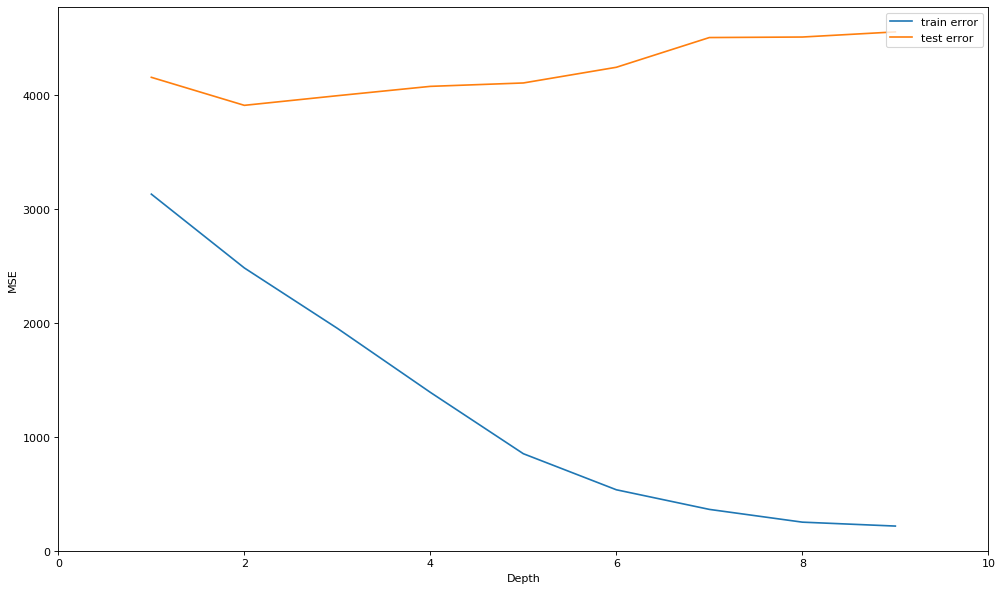

In [32]:
figure(figsize=(15, 9), dpi=80, facecolor='w', edgecolor='k')
plt.xlabel('Depth')
plt.ylabel('MSE')
plt.xlim(0, 10)
plt.plot(list(range(1,10)), train_errors, label='train error')
plt.plot(list(range(1,10)), test_errors, label='test error')
plt.legend(loc='upper right')
plt.show()

Вобщем при нашем подобранном количестве деревьев (25) с шагом 0.1 - на тестовой выборке видно, что наилучший результат дают несложные деревья - глубина 2 обеспечивает минимальную ошибку. Ну а на трейне - понятно - чем глубже - тем лучше выучивается датасет.